#### Purpose: 
MAD feature selection identifies relevant features by calculating the mean absolute difference in their values between different classes of the target variable.

#### Why it's useful:
##### It's a simple and intuitive way to understand how much a feature's values vary across different classes.
##### Features with higher MAD scores are considered more discriminative, as their values differ more significantly between classes.
##### It's particularly useful for classification tasks with numerical features.

#### How it Works:

##### Group by Class: Split your data into groups based on the unique values of your target variable (classes).

##### Calculate MAD for Each Feature:  For each feature:

###### Calculate the mean value of the feature for each class.
###### Calculate the pairwise absolute differences between the class means.
###### Take the mean of these absolute differences. This is the MAD score for that feature.
##### Rank Features: Rank features by their MAD scores in descending order.

##### Select Top Features: Select the top 'k' features or use a threshold to determine which features to keep.


##### The Mean Absolute Difference (MAD) is a measure of statistical dispersion, specifically indicating how spread out a set of data is around its mean. It's calculated in these steps:

###### Calculate the Mean: Find the average (mean) of your dataset.
###### Find Absolute Deviations: For each data point, subtract the mean and take the absolute value of the result (this ensures all deviations are positive).
###### Calculate Mean of Deviations: Average all the absolute deviations. This average is your MAD.

MAD = (1/n) * Σ|xi - x̄|

###### MAD: Mean Absolute Deviation
###### n: Number of data points
###### xi: Each individual data point
###### x̄: Mean of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, SelectPercentile

In [2]:
# We select MinMaxScaled data, because it gives more accuracy and less loss, despite too little latencycompared to StandardScaling
df = pd.read_csv("C:/Users/DilshodbekMX/PycharmProjects/Cyber/Normalization/MinMaxScaling.csv", low_memory=False)
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [3]:
def mad_score(X, y):
    class_labels = np.unique(y)
    scores = {}
    for feature in X.columns:
        class_means = {c: X[y == c][feature].mean() for c in class_labels}
        pairwise_diffs = []
        for i in range(len(class_labels)):
            for j in range(i + 1, len(class_labels)):
                pairwise_diffs.append(abs(class_means[class_labels[i]] - class_means[class_labels[j]]))
        scores[feature] = np.mean(pairwise_diffs)
    return pd.Series(scores, name='MAD')


In [4]:
X = df.drop("Label", axis=1)  # Features
y = df["Label"]

In [5]:
# Store original column names
original_columns = X.columns

In [6]:
# Calculate MAD scores
mad_scores = mad_score(X, y)

In [7]:
# Calculate the information gain for each feature
selector = SelectPercentile(lambda X, y: mad_scores, percentile=80)

In [8]:
X_new = selector.fit_transform(X, y)
X_new

array([[0.00000000e+00, 9.10801085e-02, 3.28100623e-01, ...,
        1.61511741e-03, 8.34394467e-02, 8.12283770e-02],
       [1.00000000e+00, 6.24611449e-01, 2.45482029e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.22643876e-02, 8.43429254e-02, ...,
        2.10855204e-02, 8.35312557e-02, 4.33562178e-02],
       ...,
       [1.72006000e+05, 1.64478816e-01, 8.65994849e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.72007000e+05, 3.48365591e-01, 3.60295600e-01, ...,
        6.46850964e-04, 4.84613516e-01, 4.84111914e-01],
       [1.72008000e+05, 9.63346961e-02, 9.13298250e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [9]:
# Get the selected feature names
selected_features = original_columns[selector.get_support()]
selected_features

Index(['Unnamed: 0.2', 'Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP',
       'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Active M

In [10]:
# Identify dropped columns
dropped_columns = original_columns.difference(selected_features)

print("Dropped Columns:")
print(dropped_columns)

Dropped Columns:
Index(['Active Min', 'Bwd Header Len', 'Bwd IAT Std', 'Flow Byts/s',
       'Fwd Act Data Pkts', 'Fwd Header Len', 'Pkt Len Var',
       'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts',
       'Subflow Fwd Pkts', 'Tot Bwd Pkts', 'Tot Fwd Pkts', 'TotLen Bwd Pkts',
       'TotLen Fwd Pkts', 'Unnamed: 0.1'],
      dtype='object')


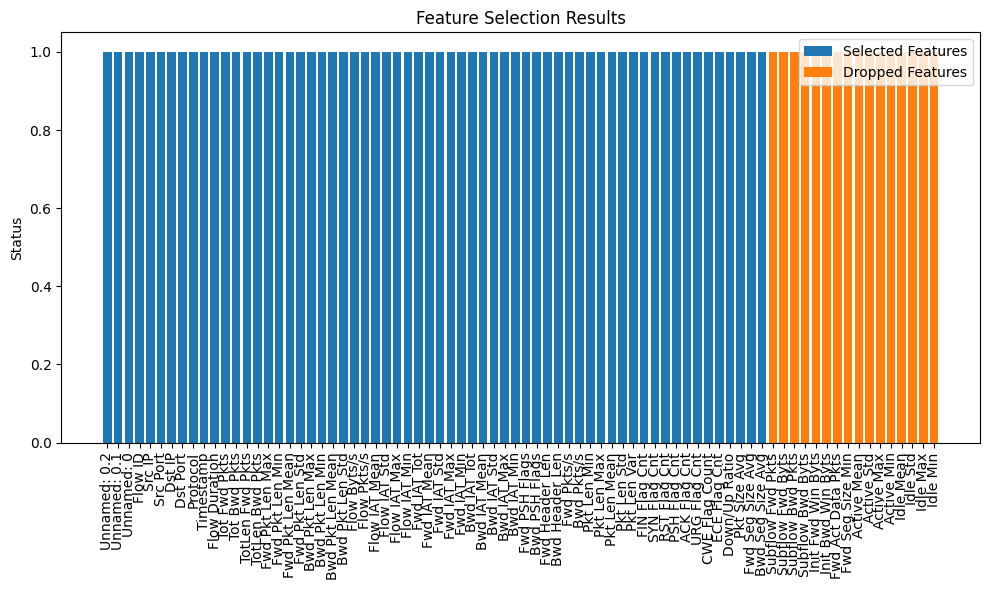

In [12]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), np.ones(len(selected_features)), label='Selected Features')
plt.bar(range(len(selected_features), len(original_columns)), np.ones(len(dropped_columns)), label='Dropped Features')
plt.xticks(range(len(original_columns)), original_columns, rotation=90)
plt.ylabel('Status')
plt.title('Feature Selection Results')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

# Assuming 'X_new' is your transformed data and 'X' is your original DataFrame
df_selected = pd.DataFrame(X_new, columns=X.columns[selector.get_support()])

(df_selected)

,Unnamed: 0.2,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,...,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.0,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,0.504694,...,0.125015,0.474380,0.454545,0.001253,0.002184,0.004293,0.083017,0.001615,0.083439,0.081228
1,1.0,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,0.000015,...,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.0,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,0.967061,...,0.000000,0.007950,0.000000,0.000618,0.001209,0.003237,0.080068,0.021086,0.083531,0.043356
3,3.0,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,0.036977,...,0.000000,0.003235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.0,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,0.015704,...,0.125015,0.959061,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,172004.0,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,0.000320,...,0.000000,0.500015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172005,172005.0,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,0.000113,...,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172006,172006.0,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,0.000010,...,0.000000,0.500015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172007,172007.0,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,0.976377,...,0.125015,0.002701,0.454545,0.003830,0.004991,0.006237,0.484363,0.000647,0.484614,0.484112


In [16]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,172004,0.999977,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172005,172005,0.999983,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
172006,172006,0.999988,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172007,172007,0.999994,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,...,0.454545,0.003830,0.004991,0.006237,0.001424,0.484363,0.000647,0.484614,0.484112,1


In [17]:
df_selected.to_csv("MeanAbsoluteDifference.csv")